# TO DO
+ Add non-local hash function [√]
+ add cross validation [√]
+ add MNIST [√]


+ add IP addresses [ ] 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr, kendalltau
import pandas as pd
import os
T = np.transpose
from hashfunctions import *
# os.chdir('/Users/tim/py_code/')
from bloom_filters import * 
import sys
sys.path.append('/Users/tim/py_code/FLY_LSH')
from read_data import *

# import hashlib # might need

max_val_hash = sys.maxsize
import xxhash
import compute_distance_metrics

# get MNIST
# mnist_path = '/Users/tim/py_code/FLY_LSH/mnist10k.txt'
mnist_path = '/home/navlakha/projects/fly_hashing/data/mnist/mnist10k.txt'
mnist = read_generic_data(mnist_path,10000,28*28) # 10 000, 784

In [2]:
dat_use = 'Erand50' # Hallem, rand100
n_ex = 200

do_10_fold = True
# eps = .01 # [.01, 6E-6]

os.chdir('/home/tsheehan/py_code/fly_dat/') # os.chdir('/Users/tim/py_code/FLY_LSH/fly_dat/')
dat = pd.read_csv("hallem1.txt",delimiter=' ')
if dat_use == 'Hallem':
    dat = dat.values
    n_ex = np.shape(dat)[0]
    do_10_fold = False
elif dat_use[:4] == 'rand':
    dIn = int(dat_use[4:])
    dat = np.random.randn(n_ex,dIn) # random data
elif dat_use[:5] == 'Erand':
    dIn = int(dat_use[5:])
    scale = 1.0 
    dat = np.random.exponential(scale,(n_ex,dIn)) # random data
elif dat_use == 'MNIST':
    dIn = 28*28
    dat = mnist[:n_ex,:]
    
n_odors = np.shape(dat)[0]
dat_100 = dat/np.mean(dat,axis=0)*100
dat_100 = np.nan_to_num(dat_100)
U = dat_100
# assert(np.shape(U)[0]==l_ex)
# np.shape(U)

In [3]:
# Cross-validation
if do_10_fold:
    n_fold = 10
    f_ind = np.round(np.linspace(0,n_odors,n_fold+1)).astype(int)
    grps = [np.arange(f_ind[i],f_ind[i+1] ) for i in range(n_fold) ] # perfect 
    
    tag_ind = list()
    query_ind = list()
    for i in range(n_fold):
        this_grp = grps[i]
        a = np.arange(n_odors)
        a = np.delete(a,this_grp)
        if 0:
            ind_probe = [np.random.choice(a,l_ex,replace=False) for i in range(len(this_grp))]
            tag_ind_i = np.concatenate([ind_probe for i in range(reps_per_fold)]) # 1:10, repeated 10 x
            query_ind_i = np.concatenate(T([this_grp for i in range(reps_per_fold)]))

        # we have convinience of all groups being the same size
        ind_probe = a
        #tag_ind_i = np.concatenate([ind_probe for i in range(len(this_grp))])
        tag_ind_i = np.tile(ind_probe,(len(this_grp),1))
        query_ind_i = this_grp

        tag_ind.append(tag_ind_i)
        query_ind.append(query_ind_i)
    else:
        tag_ind = np.array(tag_ind).reshape(n_odors,len(a))
        query_ind = np.array(query_ind).reshape(n_odors)
        
else:      # Leave one Odor Out Crossvalidation
    query_ind = list()
    tag_ind = list()
    for i in range(n_ex):
        a = np.arange(n_odors)
        a = np.delete(a,i)
        tag_ind.append(a)
    else:
        query_ind = np.arange(n_ex)
        tag_ind = np.array(tag_ind)

S = U[tag_ind] # n_ex, l_ex, n_ORN
q = U[query_ind] # n_ex, n_ORN



In [14]:

# import compute_distance_metrics
# reload(compute_distance_metrics)
# eps_try = [.5,.2,.1,.05,.01,.005,.001,.0001,.00001,.000001]
eps_try = np.logspace(np.log10(.5),np.log10(1E-6),15) 
dm = 'both'
dist_mets = list()
for ep in eps_try:
    dist_mets.append(compute_distance_metrics.get_distance_metrics(S,q,eps=ep,app_str=dat_use,
                                                                   dist_met=dm,text_out=False,ORN_SPECIAL=True))
    #foo = compute_distance_metrics.get_distance_metrics(S,q,eps=ep,app_str=dat_use,
                                                                  # dist_met=dm,text_out=False,ORN_SPECIAL=True)

/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Erand30_d1:30_PROJ:SB4_both_m:130_k:1_eps:5.0e-01  OGDIST:0.23 PROJ: -0.02 -0.01, LSHBLOOM: -0.02 -0.01, HBLOOM nan nan
Erand30_d1:30_PROJ:SB4_both_m:306_k:2_eps:2.0e-01  OGDIST:0.23 PROJ: 0.10 0.09, LSHBLOOM: 0.15 0.13, HBLOOM nan nan
Erand30_d1:30_PROJ:SB4_both_m:482_k:3_eps:7.7e-02  OGDIST:0.23 PROJ: 0.19 0.14, LSHBLOOM: 0.19 0.12, HBLOOM nan nan
Erand30_d1:30_PROJ:SB4_both_m:657_k:5_eps:3.0e-02  OGDIST:0.23 PROJ: 0.17 0.15, LSHBLOOM: 0.14 0.10, HBLOOM nan nan
Erand30_d1:30_PROJ:SB4_both_m:833_k:6_eps:1.2e-02  OGDIST:0.23 PROJ: 0.29 0.22, LSHBLOOM: 0.20 0.15, HBLOOM -0.04 -0.05
Erand30_d1:30_PROJ:SB4_both_m:1008_k:7_eps:4.6e-03  OGDIST:0.23 PROJ: 0.39 0.33, LSHBLOOM: 0.23 0.22, HBLOOM 0.00 -0.00
Erand30_d1:30_PROJ:SB4_both_m:1184_k:9_eps:1.8e-03  OGDIST:0.23 PROJ: 0.02 0.07, LSHBLOOM: 0.16 0.12, HBLOOM 0.05 0.04
Erand30_d1:30_PROJ:SB4_both_m:1359_k:10_eps:7.1e-04  OGDIST:0.23 PROJ: 0.20 0.17, LSHBLOOM: 0.12 0.11, HBLOOM nan nan
Erand30_d1:30_PROJ:SB4_both_m:1535_k:11_eps:2.8e-04  OG

In [26]:
b=0 # 0- cos, 1-euc
dm_list = ['cos','euc']
l_ex = np.shape(S)[0]
eps_try = np.logspace(np.log10(.5),np.log10(1E-6),15) 
eps_try = eps_try[:np.shape(dist_mets)[0]]
plt.plot(-np.log10(eps_try),T(dist_mets)[0+b],label='Proj Space')
plt.plot(-np.log10(eps_try),T(dist_mets)[2+b],label='LSH Bloom Filter')
# plt.plot(-np.log10(eps_try),T(dist_mets)[4+b],label='Hash Bloom Filter')
plt.plot(-np.log10(eps_try),T(dist_mets)[4+b],label='ORN Closest in KC')
# plt.semilogx(eps_try,T(dist_mets)[0],label='Proj Space')
# plt.semilogx(eps_try,T(dist_mets)[1],label='LSH Bloom Filter')
# plt.semilogx(eps_try,T(dist_mets)[2],label='Hash Bloom Filter')
plt.xlabel('$-Log_{10}$ $E(R_{FP})$')
plt.ylabel('Corr ORN Distance(%s)' %dm_list[b])
plt.legend()
plt.title('%s, (N=%d)' %(dat_use,l_ex))
plt.show()


ValueError: x and y must have same first dimension, but have shapes (15,) and (19,)

In [9]:
np.shape(q)

(200, 50)

In [23]:
dm = 'both'
m_try = np.arange(100,1001,100)
dist_mets = list()
for m in m_try:
    dist_mets.append(compute_distance_metrics.get_distance_metrics(S,q,m=m,k=int(m/15),app_str=dat_use,
                                                                   dist_met=dm,text_out=False,ORN_SPECIAL=True))

Erand30_d1:30_PROJ:SB4_both_m:100_k:6_eps:6.7e-01  OGDIST:0.23 PROJ: 0.49 0.37, LSHBLOOM: -0.03 -0.04, HBLOOM -0.01 -0.03
Erand30_d1:30_PROJ:SB4_both_m:200_k:13_eps:7.7e-01  OGDIST:0.23 PROJ: 0.34 0.22, LSHBLOOM: 0.10 0.07, HBLOOM 0.24 0.20


/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Erand30_d1:30_PROJ:SB4_both_m:300_k:20_eps:8.0e-01  OGDIST:0.23 PROJ: 0.55 0.35, LSHBLOOM: nan nan, HBLOOM 0.16 0.11
Erand30_d1:30_PROJ:SB4_both_m:400_k:26_eps:7.7e-01  OGDIST:0.23 PROJ: 0.46 0.26, LSHBLOOM: 0.05 0.03, HBLOOM 0.05 0.06
Erand30_d1:30_PROJ:SB4_both_m:500_k:33_eps:7.9e-01  OGDIST:0.23 PROJ: 0.61 0.46, LSHBLOOM: 0.16 0.13, HBLOOM 0.17 0.14
Erand30_d1:30_PROJ:SB4_both_m:600_k:40_eps:8.0e-01  OGDIST:0.23 PROJ: 0.51 0.35, LSHBLOOM: 0.21 0.17, HBLOOM 0.00 0.03
Erand30_d1:30_PROJ:SB4_both_m:700_k:46_eps:7.8e-01  OGDIST:0.23 PROJ: 0.48 0.32, LSHBLOOM: 0.24 0.21, HBLOOM 0.08 0.07
Erand30_d1:30_PROJ:SB4_both_m:800_k:53_eps:7.9e-01  OGDIST:0.23 PROJ: 0.61 0.42, LSHBLOOM: 0.14 0.12, HBLOOM -0.01 0.02
Erand30_d1:30_PROJ:SB4_both_m:900_k:60_eps:8.0e-01  OGDIST:0.23 PROJ: 0.61 0.41, LSHBLOOM: -0.08 -0.07, HBLOOM 0.04 0.05
Erand30_d1:30_PROJ:SB4_both_m:1000_k:66_eps:7.9e-01  OGDIST:0.23 PROJ: 0.52 0.32, LSHBLOOM: 0.09 0.08, HBLOOM -0.12 -0.07


In [4]:
dm = 'both'
k_try = np.arange(2,150,5)
m = 500
dist_mets = list()
for k in k_try:
    dist_mets.append(compute_distance_metrics.get_distance_metrics(S,q,m=m,k=k,app_str=dat_use,
                                                                   dist_met=dm,text_out=False,ORN_SPECIAL=True))

Erand50_d1:50_PROJ:SB4_both_m:500_k:2_eps:8.2e-53  OGDIST:0.27 PROJ: -0.05 -0.02, LSHBLOOM: 0.08 0.09, HBLOOM -0.07 -0.02
Erand50_d1:50_PROJ:SB4_both_m:500_k:7_eps:2.9e-07  OGDIST:0.27 PROJ: 0.31 0.18, LSHBLOOM: 0.15 0.11, HBLOOM 0.32 0.20
Erand50_d1:50_PROJ:SB4_both_m:500_k:12_eps:9.1e-02  OGDIST:0.27 PROJ: 0.27 0.18, LSHBLOOM: -0.01 0.03, HBLOOM 0.26 0.19
Erand50_d1:50_PROJ:SB4_both_m:500_k:17_eps:6.7e-01  OGDIST:0.27 PROJ: 0.20 0.09, LSHBLOOM: -0.01 -0.01, HBLOOM 0.32 0.22


/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Erand50_d1:50_PROJ:SB4_both_m:500_k:22_eps:9.4e-01  OGDIST:0.27 PROJ: 0.03 0.05, LSHBLOOM: nan nan, HBLOOM 0.13 0.11
Erand50_d1:50_PROJ:SB4_both_m:500_k:27_eps:9.9e-01  OGDIST:0.27 PROJ: 0.27 0.17, LSHBLOOM: nan nan, HBLOOM 0.25 0.13
Erand50_d1:50_PROJ:SB4_both_m:500_k:32_eps:1.0e+00  OGDIST:0.27 PROJ: 0.28 0.18, LSHBLOOM: nan nan, HBLOOM 0.30 0.15
Erand50_d1:50_PROJ:SB4_both_m:500_k:37_eps:1.0e+00  OGDIST:0.27 PROJ: 0.21 0.14, LSHBLOOM: nan nan, HBLOOM 0.27 0.18
Erand50_d1:50_PROJ:SB4_both_m:500_k:42_eps:1.0e+00  OGDIST:0.27 PROJ: 0.18 0.13, LSHBLOOM: nan nan, HBLOOM 0.28 0.20
Erand50_d1:50_PROJ:SB4_both_m:500_k:47_eps:1.0e+00  OGDIST:0.27 PROJ: 0.29 0.19, LSHBLOOM: nan nan, HBLOOM 0.29 0.17
Erand50_d1:50_PROJ:SB4_both_m:500_k:52_eps:1.0e+00  OGDIST:0.27 PROJ: 0.10 0.06, LSHBLOOM: nan nan, HBLOOM 0.19 0.14
Erand50_d1:50_PROJ:SB4_both_m:500_k:57_eps:1.0e+00  OGDIST:0.27 PROJ: 0.16 0.12, LSHBLOOM: nan nan, HBLOOM 0.22 0.15
Erand50_d1:50_PROJ:SB4_both_m:500_k:62_eps:1.0e+00  OGDIST:0.27 

In [ ]:
def closest_ind(S,q): # to test ORN output
    return np.argmax([cos_sim(s,q) for s in S])
def cos_sim(a,b):
    return np.dot(a,b)/(np.sqrt(np.sum(a**2)) * np.sqrt(np.sum(b**2)))


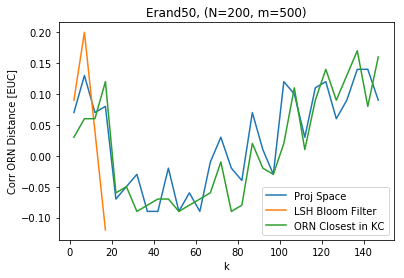

In [6]:
b=1 # 0- cos, 1-euc
dm_list = ['COS','EUC']
l_ex = np.shape(S)[0]

plt.plot(k_try,T(dist_mets)[0+b],label='Proj Space')
plt.plot(k_try,T(dist_mets)[2+b],label='LSH Bloom Filter')
# plt.plot(-np.log10(eps_try),T(dist_mets)[4+b],label='Hash Bloom Filter')
plt.plot(k_try,T(dist_mets)[4+b],label='ORN Closest in KC')

plt.xlabel('k')
plt.ylabel('Corr ORN Distance [%s]' %dm_list[b])
plt.legend()
plt.title('%s, (N=%d, m=%d)' %(dat_use,l_ex,m))
plt.show()


In [4]:
from multiprocessing import Pool


In [8]:
n_run = 10
m_try = np.arange(200,5001,200)
k_ratio_try = np.logspace(np.log10(5),np.log10(200),20)
dm = 'both'
k_ratio_try = np.logspace(np.log10(10),np.log10(100),7)
iter_options = ((x,y) for x in m_try for y in k_ratio_try)
mL = [x for x in m_try for y in k_ratio_try]
kL = [y for x in m_try for y in k_ratio_try]
def easy_dist(inputs):
#     print(np.shape(m))
    m,k_ratio = inputs
    k = int(m/k_ratio)
    out = list() # just do 1 to test
    for i in range(n_run):
        out.append(compute_distance_metrics.get_distance_metrics(S,q,m=m,k=k,app_str=dat_use,
                                                                   dist_met=dm,text_out=False,ORN_SPECIAL=True))
    out = np.mean(out,axis=0)
    return (out,m,k)
    

In [9]:
# pool.close()
pool = Pool(30)


/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalar

In [10]:
# from itertools import combinations
# combinations?



ans = pool.map(easy_dist, zip(mL,kL))


In [11]:
out_perf = T(np.array([oo[0] for oo in ans ]))
m = np.array([oo[1] for oo in ans ])
k = np.array([oo[2] for oo in ans ])


In [34]:
np.shape(out_perf)
# len(k_ratio_try)
# len(m_try)
out_mat = np.reshape(out_perf,(6,len(m_try),len(k_ratio_try)))
# np.shape(foo)
# out_perf
np.shape(out_mat[0])
# bar = np.reshape(m,(1,len(m_try),len(k_ratio_try)))


(25, 7)

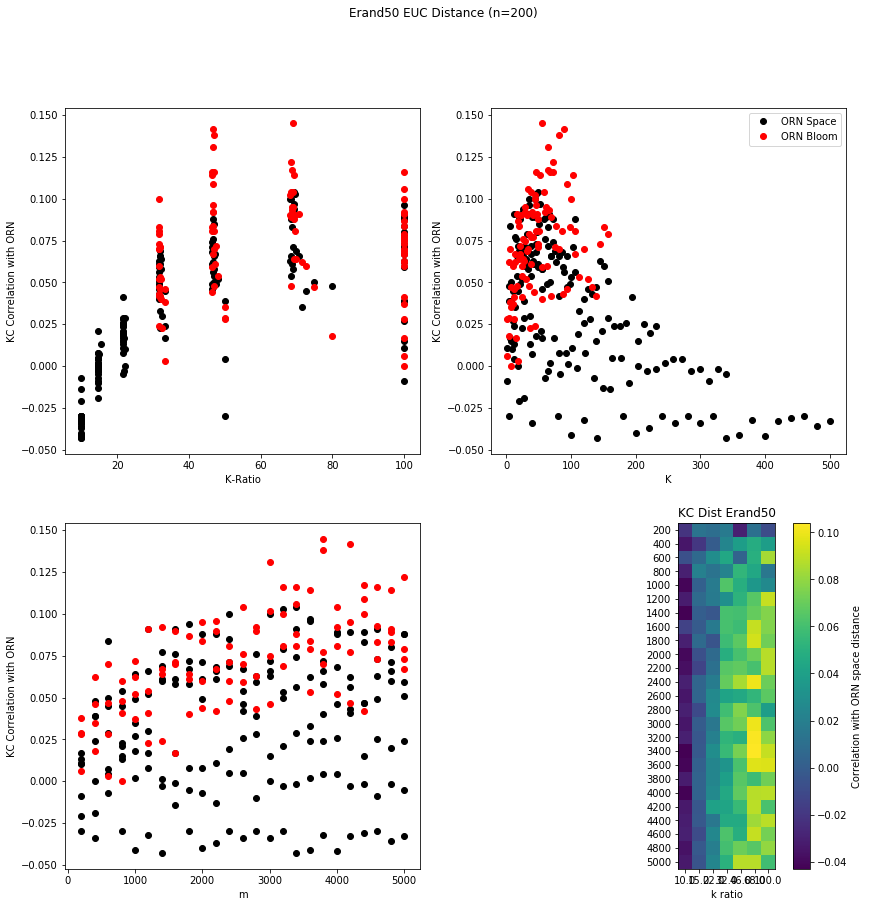

In [37]:
# kk = m_k_pos[:,:,1].flatten()
# kr = m_kRat_pos[:,:,1].flatten()
b=1
kr = m/k

cc = out_perf[0+b]
cb = out_perf[2+b]
ca = out_mat[0+b]

plt.figure(figsize=(14,14))
plt.suptitle(dat_use + [' COS',' EUC'][b] + ' Distance (n=' + str(n_ex) + ')')

plt.subplot(2,2,1)
plt.plot(kr,cc,'ko')
plt.plot(kr,cb,'ro')
plt.ylabel('KC Correlation with ORN')
plt.xlabel('K-Ratio')
plt.subplot(2,2,2)
plt.plot(k,cc,'ko',label='ORN Space')
plt.plot(k,cb,'ro',label='ORN Bloom')
plt.legend()
plt.ylabel('KC Correlation with ORN')
plt.xlabel('K')
plt.subplot(2,2,3)
plt.plot(m,cc,'ko')
plt.plot(m,cb,'ro')
plt.ylabel('KC Correlation with ORN')
plt.xlabel('m')

plt.subplot(2,2,4)
plt.title('KC Dist %s' %dat_use)
plt.imshow(ca,interpolation='none')
plt.colorbar(label='Correlation with ORN space distance')
plt.yticks(np.arange(len(m_try)),np.round(m_try))
plt.xticks(np.arange(len(k_ratio_try)),np.round(k_ratio_try))
plt.xlabel('k ratio')

plt.show()

In [24]:
m_try = np.arange(500,5001,500)
# k_ratio_try = np.arange(2,30,2)
k_ratio_try = np.logspace(np.log10(10),np.log10(100),7)
dm = 'both'

this_m_kRat = list()
this_m_k = list()
dist_met_m_k = list()
dist_sd_met_m_k = list()
n_run = 2
for m in m_try:
    for k_rat in k_ratio_try:
        k = int(m/k_rat)
        this_m_kRat.append((m,k_rat))
        this_m_k.append((m,k))
        this_run = list()
        for i in range(n_run):
            this_run.append(compute_distance_metrics.get_distance_metrics(S,q,m=m,k=k,app_str=dat_use,
                                                                   dist_met=dm,text_out=False,ORN_SPECIAL=True))
        else:
            dist_met_m_k.append(np.mean(this_run,axis=0))
            #dist_sd_met_m_k.append(np.std(this_run,axis=0))    

/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Erand50_d1:50_PROJ:SB4_both_m:5000_k:500_eps:9.9e-01  OGDIST:0.30 PROJ: 0.15 0.16, LSHBLOOM: nan nan, HBLOOM 0.28 0.25
Erand50_d1:50_PROJ:SB4_both_m:5000_k:500_eps:9.9e-01  OGDIST:0.30 PROJ: 0.14 0.15, LSHBLOOM: nan nan, HBLOOM 0.24 0.23
Erand50_d1:50_PROJ:SB4_both_m:5000_k:334_eps:8.0e-01  OGDIST:0.30 PROJ: 0.22 0.19, LSHBLOOM: -0.10 -0.12, HBLOOM 0.28 0.21
Erand50_d1:50_PROJ:SB4_both_m:5000_k:334_eps:8.0e-01  OGDIST:0.30 PROJ: 0.24 0.24, LSHBLOOM: 0.06 0.06, HBLOOM 0.31 0.26
Erand50_d1:50_PROJ:SB4_both_m:5000_k:223_eps:1.9e-01  OGDIST:0.30 PROJ: 0.37 0.25, LSHBLOOM: 0.18 0.13, HBLOOM 0.40 0.27
Erand50_d1:50_PROJ:SB4_both_m:5000_k:223_eps:1.9e-01  OGDIST:0.30 PROJ: 0.31 0.24, LSHBLOOM: 0.17 0.17, HBLOOM 0.38 0.27
Erand50_d1:50_PROJ:SB4_both_m:5000_k:149_eps:1.7e-03  OGDIST:0.30 PROJ: 0.42 0.27, LSHBLOOM: 0.20 0.13, HBLOOM 0.45 0.30
Erand50_d1:50_PROJ:SB4_both_m:5000_k:149_eps:1.7e-03  OGDIST:0.30 PROJ: 0.55 0.31, LSHBLOOM: 0.52 0.37, HBLOOM 0.56 0.33
Erand50_d1:50_PROJ:SB4_both_m:5000

In [25]:
m_kRat_pos = np.reshape(np.array(this_m_kRat),(len(m_try),len(k_ratio_try),2))
m_k_pos = np.reshape(np.array(this_m_k),(len(m_try),len(k_ratio_try),2))

In [36]:
b =0
m_k_dist = np.reshape(np.array(dist_met_m_k),(len(m_try),len(k_ratio_try),6))
cos_lsh = m_k_dist[:,:,0+b]
cos_lsh_bloom = m_k_dist[:,:,2+b]
cos_orn = m_k_dist[:,:,4+b]


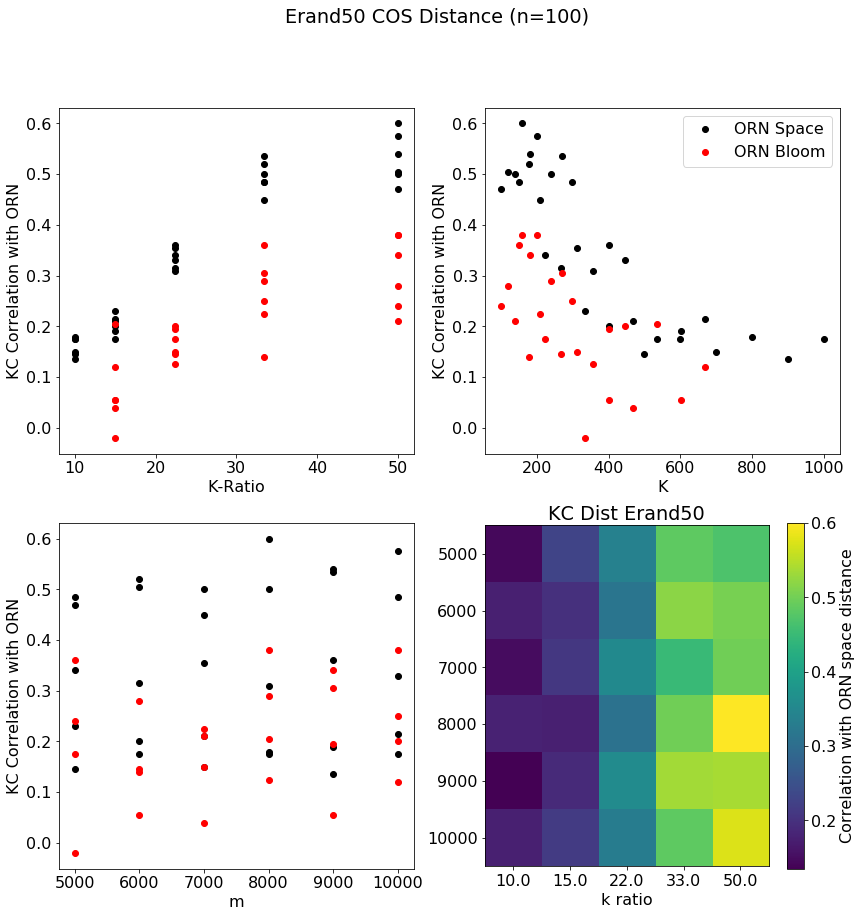

In [55]:
# k vs corr
# np.shape(m_k_pos)
kk = m_k_pos[:,:,1].flatten()
kr = m_kRat_pos[:,:,1].flatten()
mm = m_k_pos[:,:,0].flatten()
cc = cos_lsh.flatten()
cb = cos_lsh_bloom.flatten()

plt.figure(figsize=(14,14))
plt.suptitle(dat_use + [' COS',' EUC'][b] + ' Distance (n=' + str(n_ex) + ')')

plt.subplot(2,2,1)
plt.plot(kr,cc,'ko')
plt.plot(kr,cb,'ro')
plt.ylabel('KC Correlation with ORN')
plt.xlabel('K-Ratio')
plt.subplot(2,2,2)
plt.plot(kk,cc,'ko',label='ORN Space')
plt.plot(kk,cb,'ro',label='ORN Bloom')
plt.legend()
plt.ylabel('KC Correlation with ORN')
plt.xlabel('K')
plt.subplot(2,2,3)
plt.plot(mm,cc,'ko')
plt.plot(mm,cb,'ro')
plt.ylabel('KC Correlation with ORN')
plt.xlabel('m')

plt.subplot(2,2,4)
plt.title('KC Dist %s' %dat_use)
plt.imshow(cos_lsh,interpolation='none')
plt.colorbar(label='Correlation with ORN space distance')
plt.yticks(np.arange(len(m_try)),np.round(m_try))
plt.xticks(np.arange(len(k_ratio_try)),np.round(k_ratio_try))
plt.xlabel('k ratio')

plt.show()

In [43]:
from matplotlib import rcParams
rcParams.update({'font.size': 16})